# Import all zillow rent indices

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#filepath input is for if directories are different on each machine


#if csvs are in same directory as notebook, set filepath = './'
# filepath = input('Enter file path where csv files are located on your machine\n')
filepath = '../../renycdsa7parkcapstonekickoff'

# my filepath is ../../renycdsa7parkcapstonekickoff

multi = pd.read_csv(filepath + '/Zip_Zri_MultiFamilyResidenceRental.csv',dtype = {'RegionName':str})
# homes = pd.read_csv(filepath + '/Zip_Zri_AllHomesPlusMultifamily.csv',dtype = {'RegionName':str})
# single = pd.read_csv(filepath + '/Zip_Zri_SingleFamilyResidenceRental.csv',dtype = {'RegionName':str})

def zero_zips(df):
    '''Adds zeros to beginning of zip codes that were chopped off when of int dtype
    
    Args:
    
    df: name of the DataFrame'''
    return df['RegionName'].apply(lambda Z: '0'*(5-len(Z))+Z)

multi['RegionName'] = zero_zips(multi)
# homes['RegionName'] = zero_zips(homes)
# single['RegionName'] = zero_zips(single)

print(multi.shape)
# print(single.shape)
# print(homes.shape)

(1861, 120)


In [138]:
multi = pd.melt(multi, id_vars =multi.columns[:7],
                value_vars = multi.columns[7:],
               var_name = 'Date',value_name = 'Rent')
multi['Date'] = pd.to_datetime(multi['Date'])
multi.rename(columns = {'RegionName':'Zipcode'}, inplace = True)



multi.sample(10)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Rent
151813,97701,94401,San Mateo,CA,San Francisco-Oakland-Hayward,San Mateo County,1073,2017-06-01,2691.0
75796,92615,78702,Austin,TX,Austin-Round Rock,Travis County,1357,2014-01-01,NaN
146210,72443,33140,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1053,2017-03-01,2324.0
197436,96083,90201,Bell,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,171,2019-07-01,2005.0
40156,91180,76006,Arlington,TX,Dallas-Fort Worth-Arlington,Tarrant County,1076,2012-06-01,610.0
98381,66141,20018,Washington,DC,Washington-Arlington-Alexandria,District of Columbia,1610,2015-01-01,NaN
63409,58660,02148,Malden,MA,Boston-Cambridge-Newton,Middlesex County,136,2013-07-01,1778.0
134660,93287,80210,Denver,CO,Denver-Aurora-Lakewood,Denver County,669,2016-09-01,1506.0
36158,58642,02128,Boston,MA,Boston-Cambridge-Newton,Suffolk County,800,2012-04-01,1582.0
179100,61813,10473,New York,NY,New York-Newark-Jersey City,Bronx County,445,2018-09-01,2038.0


## Select Austin, TX data

In [139]:
austin = multi.loc[(multi['City'] == 'Austin') & (multi['State']=='TX')].set_index('Date')

austin.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Rent
Date,,,,,,,,
2010-09-01,92617,78704,Austin,TX,Austin-Round Rock,Travis County,65,1349.0
2010-09-01,92654,78745,Austin,TX,Austin-Round Rock,Travis County,83,1340.0
2010-09-01,92657,78748,Austin,TX,Austin-Round Rock,Travis County,282,NaN
2010-09-01,92667,78758,Austin,TX,Austin-Round Rock,Travis County,287,907.0
2010-09-01,92651,78741,Austin,TX,Austin-Round Rock,Travis County,304,1222.0


In [140]:
# plt.figure(figsize = (15,10))
# import seaborn as sns
# sns.scatterplot(data=austin_slice, x = austin_slice.index, y = 'Rent', hue = 'Zipcode')

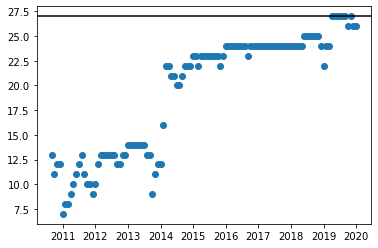

In [141]:
find_zips = austin.reset_index().set_index('Zipcode')
missing_zips =find_zips[['Date','Rent']].loc[find_zips['Rent'].isnull()]
graph_nulls = missing_zips['Date'].value_counts()

# plt.scatter(graph_nulls.index,graph_nulls)


full_zips = find_zips[['Date','Rent']].loc[~find_zips['Rent'].isnull()]
graph_full = full_zips['Date'].value_counts()

plt.scatter(graph_full.index,graph_full)
plt.axhline(y = 27,color = 'k')

## Impute for each zip code

In [142]:
fill_rents = austin[['Zipcode','Rent']].copy()
austin.drop('Rent', axis = 1, inplace = True)
fill_rents = fill_rents.reset_index().pivot(index = 'Date',columns = 'Zipcode')['Rent'].reset_index()
for code in fill_rents.columns[1:]:
     fill_rents[code].interpolate(inplace = True)
    
fill_rents.fillna(method = 'bfill',inplace = True)

fill_rents.isnull().sum()

fill_rents

Zipcode,Date,78701,78702,78703,78704,78705,78717,78723,78727,78728,...,78748,78749,78750,78751,78752,78753,78754,78757,78758,78759
0,2010-09-01,1524.0,1392.0,1377.0,1349.00,1129.0,1361.0,923.0,1350.0,975.0,...,949.0,1022.0,1012.0,1060.0,960.0,834.0,879.0,1101.0,907.0,1168.0
1,2010-10-01,1533.0,1392.0,1368.0,1342.00,1135.0,1361.0,889.0,1350.0,975.0,...,949.0,1022.0,993.0,1044.0,960.0,808.0,879.0,1101.0,885.0,1168.0
2,2010-11-01,1562.0,1392.0,1382.0,1341.00,1138.0,1361.0,855.0,1350.0,975.0,...,949.0,1022.0,974.0,1031.0,960.0,782.0,879.0,1101.0,861.0,1168.0
3,2010-12-01,1595.0,1392.0,1400.0,1354.00,1106.0,1361.0,840.0,1350.0,975.0,...,949.0,1022.0,957.0,1032.0,960.0,768.0,879.0,1101.0,839.0,1168.0
4,2011-01-01,1616.0,1392.0,1384.0,1314.25,1081.5,1361.0,830.0,1350.0,975.0,...,949.0,1022.0,935.0,1031.0,960.0,767.0,879.0,1101.0,826.0,1168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2019-09-01,2309.0,1694.0,1925.0,1586.00,1607.0,1406.0,1499.0,1380.0,1232.0,...,1425.0,1389.0,1342.0,1417.0,1477.0,1216.0,1284.0,1320.0,1392.0,1625.0
109,2019-10-01,2327.0,1732.0,1946.0,1619.00,1608.0,1441.0,1483.0,1392.0,1251.0,...,1394.0,1409.0,1352.0,1411.0,1452.0,1227.0,1285.0,1331.0,1372.0,1605.5
110,2019-11-01,2336.0,1750.0,1970.0,1610.00,1611.0,1452.0,1488.0,1393.0,1269.0,...,1416.0,1399.0,1375.0,1423.0,1471.0,1251.0,1303.0,1361.0,1382.0,1586.0
111,2019-12-01,2326.0,1735.0,1943.0,1592.00,1613.0,1453.0,1497.0,1392.0,1275.0,...,1387.0,1409.0,1387.0,1419.0,1489.0,1273.0,1310.0,1363.0,1398.0,1613.0


In [143]:
fill_rents = pd.melt(fill_rents, id_vars='Date', value_vars = fill_rents.columns[1:],var_name='Zipcode',value_name = 'Rent')

fill_rents.head()

,Date,Zipcode,Rent
0,2010-09-01,78701,1524.0
1,2010-10-01,78701,1533.0
2,2010-11-01,78701,1562.0
3,2010-12-01,78701,1595.0
4,2011-01-01,78701,1616.0


In [144]:
austin = pd.merge(austin, fill_rents, on = ['Date','Zipcode'])

In [145]:
austin.groupby('Zipcode')['SizeRank'].value_counts()

Zipcode  SizeRank
78701    1749        113
78702    1357        113
78703    1288        113
78704    65          113
78705    1223        113
78717    1057        113
78723    888         113
78727    1090        113
78728    1246        113
78729    990         113
78730    1831        113
78731    1144        113
78735    1518        113
78741    304         113
78744    752         113
78745    83          113
78746    1282        113
78748    282         113
78749    919         113
78750    1325        113
78751    1558        113
78752    1593        113
78753    324         113
78754    1542        113
78757    1380        113
78758    287         113
78759    358         113
Name: SizeRank, dtype: int64

# Importing data from BLS and BEA

In [146]:
# labor = pd.read_excel('~/Downloads/atx_laborforce.xlsx',skiprows=10)


# labor = pd.melt(labor, id_vars = 'Year', value_vars = labor.columns[1:],var_name = 'Month', value_name = 'LaborForce')

# labor.sample(15)

In [147]:
personal = pd.read_csv('~/Downloads/atx_personal.csv',skiprows = 4)

personal.head()

,GeoFips,GeoName,LineCode,Description,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",1.0,Personal income (thousands of dollars),52344576.0,58694122.0,62599379.0,67819889.0,65884392.0,70355303.0,77881693.0,85635903.0,88954305.0,97179427.0,103077251.0,108054841.0,118651329.0,129146253.0,138028065.0
1,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",2.0,Population (persons) 1/,1453358.0,1515485.0,1577856.0,1633870.0,1682338.0,1727502.0,1780535.0,1834586.0,1883315.0,1942467.0,2002134.0,2062016.0,2115475.0,2165497.0,2227083.0
2,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",3.0,Per capita personal income (dollars) 2/,36016.0,38730.0,39674.0,41509.0,39162.0,40727.0,43741.0,46679.0,47233.0,50029.0,51484.0,52403.0,56087.0,59638.0,61977.0
3,Legend / Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/ Census Bureau midyear population estimates....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# leisure = pd.read_excel('~/Downloads/atx_leisure.xlsx',skiprows = 12)
# leisure.head(12)

# leisure = pd.melt(leisure, id_vars = 'Year', value_vars = leisure.columns[1:],var_name = 'Month', value_name = 'NumEmp')
# leisure['NumEmp'] = leisure['NumEmp'].apply(lambda N: N*1000)
# leisure.sample(15)

# atx = pd.merge(labor,leisure, on = ['Year','Month'])
# atx.sample(15)

# atx.to_csv('atx_leisure_labor.csv',index=False)

In [148]:
personal= personal.loc[:2,:]
personal = pd.melt(personal, id_vars = 'Description', value_vars = personal.columns[4:],var_name='Year')

personal.head()

,Description,Year,value
0,Personal income (thousands of dollars),2005,52344576.0
1,Population (persons) 1/,2005,1453358.0
2,Per capita personal income (dollars) 2/,2005,36016.0
3,Personal income (thousands of dollars),2006,58694122.0
4,Population (persons) 1/,2006,1515485.0


In [149]:
personal = personal.pivot(index = 'Year',columns = 'Description')['value'].reset_index()

personal.columns = ['Year','Income_per_capita','Personal_income','Population']

pers_inc = personal[['Year','Income_per_capita','Population']].copy()

pers_inc.head()

,Year,Income_per_capita,Population
0,2005,36016.0,1453358.0
1,2006,38730.0,1515485.0
2,2007,39674.0,1577856.0
3,2008,41509.0,1633870.0
4,2009,39162.0,1682338.0


In [153]:
#made the csv in another directory
atx = pd.read_csv('../../renycdsa7parkcapstonekickoff/atx_leisure_labor.csv')
atx.rename(columns = {'NumEmp':'LeisureEmp'},inplace = True)

In [154]:
pers_inc['Year'] = pers_inc['Year'].astype(int)
atx = pd.merge(atx,pers_inc, how = 'left', on = 'Year')

atx.head(15)

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
0,2011,Jan,944609.0,84800.0,43741.0,1780535.0
1,2012,Jan,973023.0,88800.0,46679.0,1834586.0
2,2013,Jan,1005093.0,94500.0,47233.0,1883315.0
3,2014,Jan,1035195.0,100300.0,50029.0,1942467.0
4,2015,Jan,1055960.0,106800.0,51484.0,2002134.0
5,2016,Jan,1095060.0,115700.0,52403.0,2062016.0
6,2017,Jan,1138412.0,119500.0,56087.0,2115475.0
7,2018,Jan,1178562.0,124100.0,59638.0,2165497.0
8,2019,Jan,1221167.0,129300.0,61977.0,2227083.0
9,2020,Jan,1253815.0,132500.0,NaN,NaN


In [155]:
import calendar

month_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}

month_num

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [156]:
atx['Month'] = atx['Month'].apply(lambda M: month_num[M])

atx.sample()

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
104,2016,10,1131782.0,123300.0,52403.0,2062016.0


In [157]:
atx['Date'] = atx[['Year','Month']].apply(lambda D: '-'.join(D.values.astype(str)), axis = 1)
atx['Date'] = pd.to_datetime(atx['Date'])

In [158]:
atx.head()

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population,Date
0,2011,1,944609.0,84800.0,43741.0,1780535.0,2011-01-01
1,2012,1,973023.0,88800.0,46679.0,1834586.0,2012-01-01
2,2013,1,1005093.0,94500.0,47233.0,1883315.0,2013-01-01
3,2014,1,1035195.0,100300.0,50029.0,1942467.0,2014-01-01
4,2015,1,1055960.0,106800.0,51484.0,2002134.0,2015-01-01


## Import credit card data from CFPB

In [159]:
cc_volume = pd.read_csv('~/Downloads/volume_data_Income_Level_CRC.csv')

In [160]:
#keep only the low and moderate income data

cc_volume = cc_volume.loc[cc_volume['income_level_group'].isin(['Low','Moderate'])]

cc_volume.head(10)

,month,date,vol,vol_unadj,income_level_group
2,60,2005-01,4.578106e+09,3.978007e+09,Moderate
3,60,2005-01,7.635135e+08,6.517910e+08,Low
6,61,2005-02,4.563908e+09,3.900504e+09,Moderate
7,61,2005-02,7.558710e+08,6.549358e+08,Low
10,62,2005-03,4.762458e+09,4.775794e+09,Moderate
11,62,2005-03,8.171551e+08,8.352900e+08,Low
14,63,2005-04,4.744005e+09,4.683566e+09,Moderate
15,63,2005-04,7.854169e+08,7.721479e+08,Low
18,64,2005-05,4.752915e+09,4.608128e+09,Moderate
19,64,2005-05,8.289172e+08,8.354502e+08,Low


In [161]:
cc_volume = cc_volume.pivot(index = 'date', columns = 'income_level_group')['vol'].reset_index()

cc_volume.columns = ['Date','Low_income_volume','Moderate_income_volume']

cc_volume.head()

,Date,Low_income_volume,Moderate_income_volume
0,2005-01,7.635135e+08,4.578106e+09
1,2005-02,7.558710e+08,4.563908e+09
2,2005-03,8.171551e+08,4.762458e+09
3,2005-04,7.854169e+08,4.744005e+09
4,2005-05,8.289172e+08,4.752915e+09


In [162]:
cc_volume['Date'] = pd.to_datetime(cc_volume['Date'])

In [44]:
cc_volume

,Date,Low_income_volume,Moderate_income_volume
0,2005-01-01,7.635135e+08,4.578106e+09
1,2005-02-01,7.558710e+08,4.563908e+09
2,2005-03-01,8.171551e+08,4.762458e+09
3,2005-04-01,7.854169e+08,4.744005e+09
4,2005-05-01,8.289172e+08,4.752915e+09
...,...,...,...
158,2018-03-01,8.935432e+08,4.476840e+09
159,2018-04-01,8.753101e+08,4.440339e+09
160,2018-05-01,8.904970e+08,4.571036e+09
161,2018-06-01,8.982546e+08,4.398129e+09


In [163]:
austin = pd.merge(austin,cc_volume, how = 'left', on = 'Date')

In [164]:
austin = pd.merge(austin, atx, how = 'left', on = 'Date')

In [165]:
austin.head(15)

,Date,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Rent,Low_income_volume,Moderate_income_volume,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
0,2010-09-01,92617,78704,Austin,TX,Austin-Round Rock,Travis County,65,1349.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-09-01,92654,78745,Austin,TX,Austin-Round Rock,Travis County,83,1340.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-09-01,92657,78748,Austin,TX,Austin-Round Rock,Travis County,282,949.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-09-01,92667,78758,Austin,TX,Austin-Round Rock,Travis County,287,907.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-09-01,92651,78741,Austin,TX,Austin-Round Rock,Travis County,304,1222.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-09-01,92662,78753,Austin,TX,Austin-Round Rock,Travis County,324,834.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-09-01,92668,78759,Austin,TX,Austin-Round Rock,Travis County,358,1168.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-09-01,92653,78744,Austin,TX,Austin-Round Rock,Travis County,752,1255.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-09-01,92634,78723,Austin,TX,Austin-Round Rock,Travis County,888,923.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-09-01,92658,78749,Austin,TX,Austin-Round Rock,Travis County,919,1022.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
austin.to_csv('austin_data.csv', index = False)

In [167]:
austin_df = austin.drop(['RegionID','City','State','Metro','CountyName','Year','Month'],axis = 1).\
sort_values(by = 'Date').set_index('Date')

In [136]:

austin_df.head(15)

,Zipcode,SizeRank,Rent,Low_income_volume,Moderate_income_volume,LaborForce,NumEmp,Income_per_capita,Population
Date,,,,,,,,,
2010-09-01,78704,65,1349.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78730,1831,1243.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78701,1749,1524.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78752,1593,960.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78751,1558,1060.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78754,1542,879.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78735,1518,1375.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78757,1380,1101.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78750,1325,1012.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN


In [168]:
austin_slice = austin_df['2011-01-01':'2018-07-01']

In [169]:
austin_slice.isnull().sum()

Zipcode                   0
SizeRank                  0
Rent                      0
Low_income_volume         0
Moderate_income_volume    0
LaborForce                0
LeisureEmp                0
Income_per_capita         0
Population                0
dtype: int64

In [170]:
len(austin_df['Zipcode'].value_counts())

27

In [55]:
austin_df.isnull().sum(axis = 0)

Zipcode                     0
SizeRank                    0
Rent                        0
Low_income_volume         486
Moderate_income_volume    486
LaborForce                108
Income_per_capita         135
Population                135
dtype: int64

In [56]:
austin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3051 entries, 2010-09-01 to 2020-01-01
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zipcode                 3051 non-null   object 
 1   SizeRank                3051 non-null   int64  
 2   Rent                    3051 non-null   float64
 3   Low_income_volume       2565 non-null   float64
 4   Moderate_income_volume  2565 non-null   float64
 5   LaborForce              2943 non-null   float64
 6   Income_per_capita       2916 non-null   float64
 7   Population              2916 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 294.5+ KB


# Predict using random forest

In [171]:
aus_forest = austin_slice.copy()
aus_forest['Zipcode'] = aus_forest['Zipcode'].astype(int)

# aus_forest.drop(['Zipcode','SizeRank'],axis = 1, inplace = True)

from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

In [172]:
from sklearn.model_selection import train_test_split
import numpy as np
y = np.log(aus_forest['Rent'])
X = aus_forest.drop('Rent', axis = 1)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [173]:
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9937698509344971

In [174]:
rfc.score(Xtrain,ytrain)

0.9989321778907773

In [175]:
from sklearn.model_selection import cross_validate, KFold

cv = KFold(n_splits = 5, shuffle = True)

In [176]:
cv_res = cross_validate(RandomForestRegressor(),X,y, cv = cv)

In [178]:
np.mean(cv_res['test_score'])

0.99239268125675

In [70]:
cv_res2 = cross_validate(RandomForestRegressor(),Xtrain,ytrain,cv = cv)

In [71]:
for col, imp in zip(X.columns,rfc.feature_importances_):
    print(f'{col}: {imp}')

Zipcode: 0.5955161016438755
SizeRank: 0.16391889600296394
Low_income_volume: 0.03173038387873444
Moderate_income_volume: 0.026779749049989886
LaborForce: 0.17582107345145112
Income_per_capita: 0.002471835652432594
Population: 0.003761960320552539


In [ ]:
len(aus_forest['Zipcode'].value_counts())

In [ ]:
zipcodes.sample()

# Try random forest using population from BigQuery

In [50]:
zipcodes = pd.read_csv('~/Downloads/zipcode_2.csv')

In [51]:
zipcodes = zipcodes[['geo_id','total_pop']]

aus_zip = zipcodes.loc[zipcodes['geo_id'].isin(aus_forest['Zipcode'])]

In [52]:
aus_zip

,geo_id,total_pop
3005,78751,15805
4320,78727,29509
5735,78701,9427
9390,78705,33948
9416,78752,21324
9617,78729,29315
10243,78744,48969
11172,78757,24823
15172,78731,27175
15181,78730,9186


In [53]:
aus_forest2 = pd.merge(aus_forest,aus_zip, left_on = 'Zipcode', right_on = 'geo_id')

In [54]:
aus_forest2.drop(['Population','geo_id'], axis = 1, inplace = True)

In [55]:
np.sum(aus_zip['total_pop'])

883523

In [57]:
aus_forest2['total_pop'].value_counts()

24408    91
48969    91
20890    91
27175    91
21324    91
23389    91
37774    91
9186     91
21480    91
33948    91
15805    91
30218    91
42524    91
28495    91
50997    91
24823    91
47470    91
29315    91
29509    91
9427     91
62771    91
48486    91
52716    91
17923    91
59085    91
34569    91
30847    91
Name: total_pop, dtype: int64

In [58]:
y = np.log(aus_forest2['Rent'])
X = aus_forest2.drop('Rent', axis = 1)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [59]:
rfc = RandomForestRegressor()
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9855537954996192

In [60]:
rfc.score(Xtrain,ytrain)

0.9986993794673262

In [61]:
from sklearn.model_selection import cross_validate, KFold

cv = KFold(n_splits = 5, shuffle = True)

In [62]:
cv_res = cross_validate(RandomForestRegressor(),X,y, cv = cv)

In [63]:
cv_res2 = cross_validate(RandomForestRegressor(),Xtrain,ytrain,cv = cv)

In [64]:
np.mean(cv_res['test_score'])

0.9921499463037906

In [65]:
for col, imp in zip(X.columns,rfc.feature_importances_):
    print(f'{col}: {imp}')

Zipcode: 0.5321112834011249
SizeRank: 0.07670856556237543
Low_income_volume: 0.02572542174396773
Moderate_income_volume: 0.03323322483321875
LaborForce: 0.16960006491883495
Income_per_capita: 0.006247159584591646
total_pop: 0.15637427995588646


## OLS

In [66]:
austin_ols = pd.get_dummies(austin_slice, columns = ['Zipcode'], drop_first = True)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [67]:
austin_ols

,SizeRank,Rent,Low_income_volume,Moderate_income_volume,LaborForce,Income_per_capita,Population,Zipcode_78702,Zipcode_78703,Zipcode_78704,...,Zipcode_78748,Zipcode_78749,Zipcode_78750,Zipcode_78751,Zipcode_78752,Zipcode_78753,Zipcode_78754,Zipcode_78757,Zipcode_78758,Zipcode_78759
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1288,1384.000000,3.864480e+08,2.351604e+09,944609.0,43741.0,1780535.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1282,1419.714286,3.864480e+08,2.351604e+09,944609.0,43741.0,1780535.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1325,935.000000,3.864480e+08,2.351604e+09,944609.0,43741.0,1780535.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01,1357,1392.000000,3.864480e+08,2.351604e+09,944609.0,43741.0,1780535.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1380,1101.000000,3.864480e+08,2.351604e+09,944609.0,43741.0,1780535.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,752,1283.000000,8.639582e+08,4.220966e+09,1203826.0,59638.0,2165497.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-01,888,1386.000000,8.639582e+08,4.220966e+09,1203826.0,59638.0,2165497.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-01,919,1221.000000,8.639582e+08,4.220966e+09,1203826.0,59638.0,2165497.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
y = np.log(austin_ols.Rent)
X = austin_ols.drop('Rent', axis = 1)
X_cols = X.columns

In [69]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [70]:
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [71]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

In [72]:
ols.fit(Xtrain,ytrain)
ols.score(Xtest,ytest)

0.8814049174708789

In [73]:
ols_results = cross_validate(LinearRegression(),X,y, cv = cv)

In [74]:
np.mean(ols_results['test_score'])

0.8803536779611051

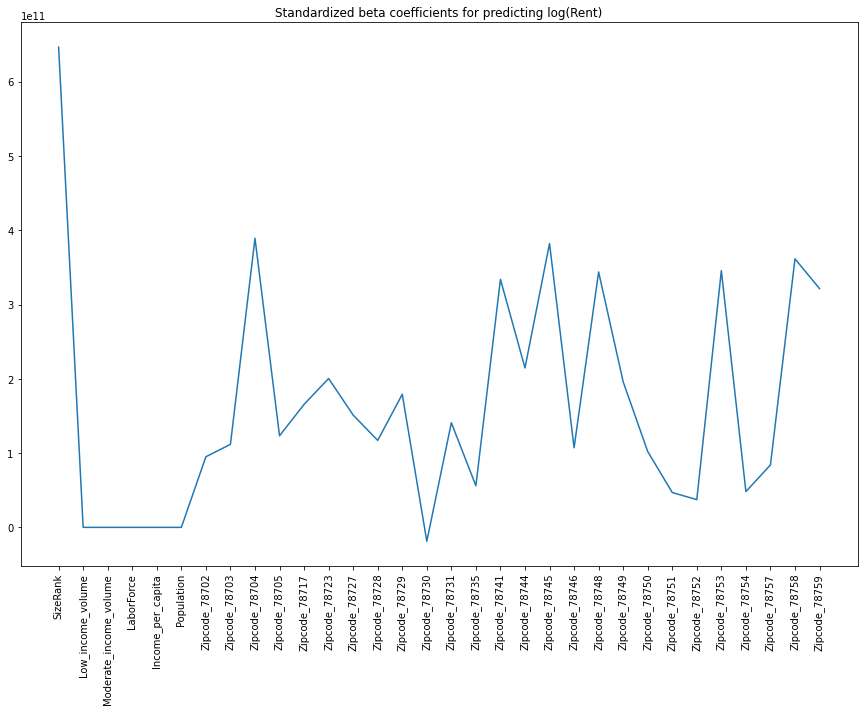

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(ols.coef_)
plt.xticks(ticks = range(len(X_cols)),labels = X_cols,rotation = 90)
plt.title('Standardized beta coefficients for predicting log(Rent)')
plt.show()

# Attempts at time series analysis

In [77]:
token = 'Zipcode'
for code, value in austin_df.groupby(token):
            print(code)
            print(value.drop([token],axis=1).rolling(3).mean().head(10))

78701
            SizeRank         Rent  Low_income_volume  Moderate_income_volume  \
Date                                                                           
2010-09-01       NaN          NaN                NaN                     NaN   
2010-10-01       NaN          NaN                NaN                     NaN   
2010-11-01    1749.0  1539.666667       3.979657e+08            2.268473e+09   
2010-12-01    1749.0  1563.333333       4.186122e+08            2.391845e+09   
2011-01-01    1749.0  1591.000000       4.146187e+08            2.417486e+09   
2011-02-01    1749.0  1615.333333       4.038277e+08            2.437935e+09   
2011-03-01    1749.0  1634.000000       4.230648e+08            2.443053e+09   
2011-04-01    1749.0  1650.000000       4.348210e+08            2.463805e+09   
2011-05-01    1749.0  1666.666667       4.556104e+08            2.522875e+09   
2011-06-01    1749.0  1683.666667       4.363714e+08            2.548866e+09   

               LaborForce  Income

In [93]:
rents = austin_slice['Rent'].loc[austin_slice['Zipcode'] == '78746'].copy()

(0.0, 0.5)

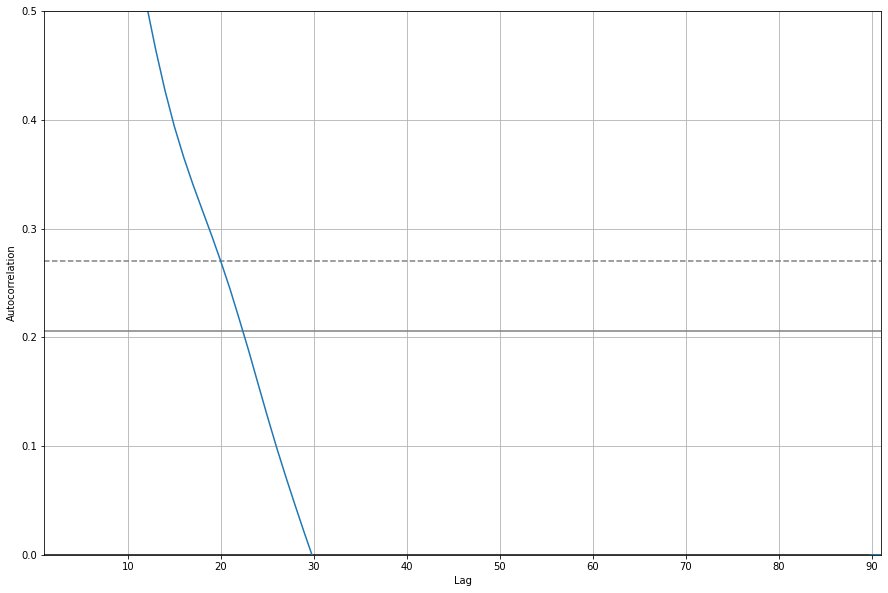

In [118]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (15,10))
autocorrelation_plot(rents)
plt.ylim([0,0.5])

In [122]:
from statsmodels.tsa.arima.model import ARIMA

In [124]:
# rents.index = rents.index.to_period('M')
model = ARIMA(rents, order = (20,1,0))

In [125]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rent   No. Observations:                   91
Model:                ARIMA(20, 1, 0)   Log Likelihood                -315.655
Date:                Sun, 21 Mar 2021   AIC                            673.310
Time:                        17:59:33   BIC                            725.806
Sample:                    01-31-2011   HQIC                           694.480
                         - 07-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8766      0.126      6.932      0.000       0.629       1.124
ar.L2          0.3210      0.182      1.762      0.078      -0.036       0.678
ar.L3         -0.3808      0.200     -1.907      0.0

## Use dickey-fuller test to assess stationary

In [180]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(rents, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [182]:
print(dfoutput)
print('Dickey-Fuller results indicate time series is non-stationary.')

Test Statistic                 -1.675123
p-value                         0.443973
#Lags Used                      4.000000
Number of Observations Used    86.000000
dtype: float64
Dickey-Fuller results indicate time series is non-stationary.


In [184]:
first_diff = np.diff(rents)
dftest = adfuller(first_diff, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [186]:
print(dfoutput)
print('Taking first derivative makes it stationary')

Test Statistic                 -4.842153
p-value                         0.000045
#Lags Used                      3.000000
Number of Observations Used    86.000000
dtype: float64
Taking first derivative makes it stationary


(-50.0, 50.0)

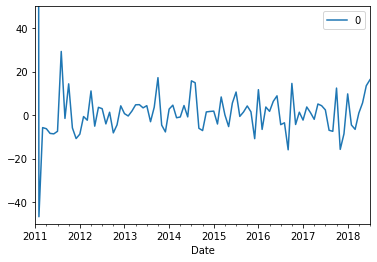

In [127]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

plt.ylim([-50,50])

<AxesSubplot:ylabel='Density'>

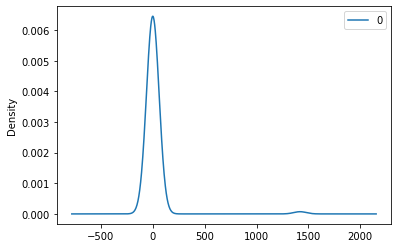

In [128]:
residuals.plot(kind='kde')

In [129]:
residuals.describe()

,0
count,91.000000
mean,15.957930
std,149.074501
min,-46.746251
25%,-4.855254
50%,1.117350
75%,4.479287
max,1419.714286


/Users/pizac/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=1566.300380, expected=1544.000000
predicted=1514.788582, expected=1540.000000
predicted=1526.922188, expected=1524.000000
predicted=1526.733530, expected=1518.000000
predicted=1509.566921, expected=1511.000000
predicted=1507.078822, expected=1509.000000
predicted=1503.950197, expected=1508.000000
predicted=1510.958701, expected=1507.000000
predicted=1508.120867, expected=1515.000000
predicted=1512.839175, expected=1522.000000
predicted=1528.058983, expected=1530.000000
predicted=1534.617618, expected=1529.000000
predicted=1531.219929, expected=1520.000000
predicted=1509.223023, expected=1523.000000
predicted=1524.858599, expected=1508.000000
predicted=1509.492178, expected=1497.000000
predicted=1481.078292, expected=1492.000000
predicted=1488.991428, expected=1483.000000
predicted=1478.087594, expected=1469.000000
predicted=1457.634229, expected=1459.000000
predicted=1450.302248, expected=1453.000000
predicted=1442.949772, expected=1461.000000
predicted=1469.463493, expected=

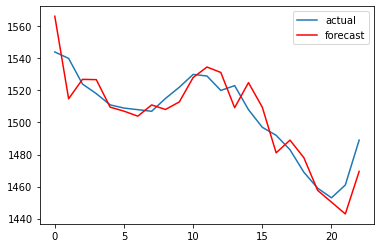

In [187]:
# split into train and test sets
from sklearn.metrics import mean_squared_error
X = rents.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(25,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(typ = 'levels')
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['actual','forecast'])
plt.show()



### NYCDSA method

In [188]:
# from statsmodels.tsa.statespace import sarimax

In [ ]:
# sarimax()

In [134]:
# predictions = []
# mse         = []

# for i in range(0, ret_train2.shape[0]-train_window):
#     loc   = slice(i, i+train_window)  # slice object abstracting start:end:step into an slice object
    
#     endog = ret_train2[endo_tickers].iloc[loc]
#     exog  = ret_train2[exog_tickers].iloc[loc] if useExog else None
#     new_model = VARMAX(endog=endog, exog = exog, order=order)


#     with warnings.catch_warnings():
#             warnings.filterwarnings("ignore", module='statsmodels')
#             res2 = new_model.fit(start_params=res2.params, disp=False,
#                                  maxiter=1000, method='lbfgs')
#             predicted_value = res2.predict()
            
#     mse.append(((endog-predicted_value)**2).mean(axis=0))
#     exog2 = exog.iloc[[-1]] if useExog else None
#     predictions.append(res2.forecast(1, exog = exog2))
#     if i%10 == 0:
#         print('Finish the %3d-th rolling 1-step-ahead forecast' %(i))

# predictions = pd.concat(predictions) 
# mse         = pd.concat(mse, axis=1)
# print("Terminated!")

NameError: name 'ret_train2' is not defined